# Ejercicio 3 - Resistencia al ruido.
## Enunciado.

Genere datasets con d = 5, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando el valor de C (overlapping de las clases) de 0.5 a 2.5 con incrementos de 0.5. Como en el punto anterior, para cada valor dado de C cree 20 conjuntos distintos de entrenamiento, pero uno solo de test. Genere una gráfica del test-error en función de C para el problema "paralelo" y el "diagonal" (sólo los promedios de los 20 conjuntos para cada valor de C).

También incluya en la gráfica los valores mínimos que se piden en el opcional 3.1 (el que no haga el opcional los puede pedir a la catedra). Todos los resultados de los dos problemas y el error mínimo en la misma gráfica. Discuta los resultados.

## Resolucion.
Comencemos por definir las funciones que nos serviran para el caso de diagonales y el caso de paralelas.

In [49]:
from Generadores import diagonales, paralelas
from Comunes import standardTree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss


In [37]:
# Definimos una funcion que dados los parametros y la lista de valores de C genere la lista de training sets
def generateTrainingSetsC(setCount, generator, d, n, cvals):

    # Inicializamos la lista de conjuntos de entrenamiento
    trainingSets = [[] for _ in range(len(cvals))]
    
    # Para cada valor de C
    for i, C in enumerate(cvals):

        # Generamos setCount conjuntos de entrenamiento de tamaño n
        for _ in range(setCount):
            trainingSets[i].append(generator(n, d, C))
            # time.sleep(1)    

    return trainingSets


In [38]:
# La funcion para generar clasificadores es identica a la del ejercicio anterior, donde setSizesCount es cValsCount
def generateClassifiers(cValsCount, setCount, trainingSets):
    # Creamos la lista de listas de clasificadores. La lista contiene setSizesCount listas con setCount clasificadores cada una.
    classifiers = [[] for _ in range(cValsCount)]
    
    # Creamos los clasificadores
    for classifierList in classifiers:
        for i in range(setCount):
            classifierList.append(standardTree())
    
    # Entrenamos los clasificadores con su set de entrenamiento correspondiente.
    for i,classifierList in enumerate(classifiers):
        for j,classifier in enumerate(classifierList):
            classifier.fit(list(trainingSets[i][j]["Input"]), list(trainingSets[i][j]["Output"]))

    return classifiers

In [40]:
# Devuelve testErrors como tupla.
def getPerformanceStats(cValsCount, setCount, testSets, classifiers):
    # Creamos una lista de listas de errores. La lista contiene cValsCount listas con setCount elementos cada una, de manera que 
    # testError[i][j] es el error de test para el classifier[i][j].
    
    # Esto sera la salida de nuestra funcion.
    testErrors     = [[] for _ in range(cValsCount)] 
    
    # Para cada lista de conjuntos de entrenamiento
    for i in range(cValsCount):
    
        # Y para cada conjunto de entrenamientos dentro de la lista
        for j in range(setCount):
    
            # Extraemos su clasificador asociado
            classifier = classifiers[i][j]
    
            # Predecimos los outputs sobre el conjunto de test y calculamos su loss
            testPredict = classifier.predict(list(testSets[i]["Input"]))
            testLoss = zero_one_loss(testSets[i]["Output"], testPredict)
            
            testErrors[i].append(testLoss)
    
    return testErrors



In [71]:
def plotErrors(testErrors, cVals):
    
    # Una vez calculados los errores y cantidad de nodos para cada par de clasificador y conjunto de entrenamiento, tomamos las medias
    meanTestErrors     = [np.mean(errorList) for errorList in testErrors]
    
    fig, axe = plt.subplots(1, 1, figsize = (10, 4))
    
    # Graficamos error de entrenamiento contra error de testeo
    axe.plot(cVals, meanTestErrors, color="orange", marker='s', linestyle='-', linewidth=2, markersize=8, label='Error de testeo diagonal')
    axe.set_xlabel("Varianza C", fontsize=12)
    axe.set_ylabel("Tasa de error", fontsize=12)
    axe.set_title("Error de testeo", fontsize=14)
    axe.grid(True, which="both", linestyle='--', alpha=0.5)
    axe.legend(fontsize=10)
    
    # Marcamos los tamaños adecuados en el eje X
    axe.set_xticks(cVals)  
    axe.get_xaxis().set_major_formatter(plt.ScalarFormatter()) # Esto cambia los numeros a notacion normal y no cientifica
    axe.tick_params(axis='x', which='minor', bottom=False)     # Esconde los ticks del eje que no son relevantes
    
    # Y setteamos los valores del eje Y para que matcheen con nuestros resultados
    axe.set_yticks(np.round(sorted(set(meanTestErrors)), decimals=2))
    
    plt.show()


In [42]:
# Definimos los parametros
d = 5
ntrain = 250
ntest = 10000
cvals = [0.5, 1, 1.5, 2, 2.5]

setCount = 20
cValsCount = 5

In [43]:
# Caso diagonales.
testSetsDiagonales = []

for cval in cvals:
    testSetsDiagonales.append(diagonales(ntest,d,cval))
    # time.sleep(1)

trainingSetsDiagonales = generateTrainingSetsC(setCount, diagonales, d, ntrain, cvals)

In [44]:
diagonalClassifiers = generateClassifiers(cValsCount, setCount, trainingSetsDiagonales)

In [45]:
testErrors = getPerformanceStats(cValsCount, setCount, testSetsDiagonales, diagonalClassifiers)

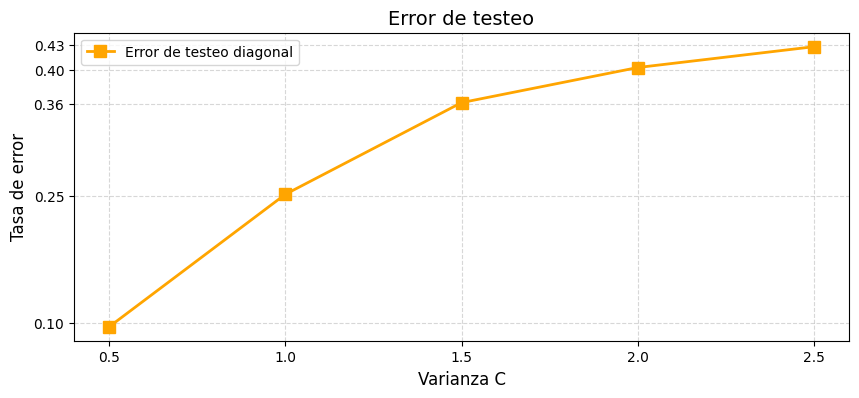

In [72]:
plotErrors(testErrors, cvals)

# Ejercicio 3.1 (Opcional).
Puede calcular para cada valor de C cuál es el mínimo error que se puede conseguir? Cómo se comparan dichos valores con los obtenidos con el árbol? Obtenga una curva de error mínimo y agréguela a la gráfica anterior. Explique brevemente cómo obtuvo los valores mínimos.
Hay varias maneras de hacerlo. Una simple es imaginando cuál es el clasificador ideal o de mínimo error para este problema (a ese clasificador se lo llama "clasificador de Bayes") y midiendo directamente sobre un conjunto de test grande (10000 puntos para d=5) cuántos puntos son mal clasificados por ese clasificador ideal. Para que verifiquen sus resultados, el error de Bayes para el diagonal con C=1.00 es 15.86%